<a href="https://colab.research.google.com/github/gpetrini/AKB_2019/blob/master/AKB_2019_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time checking:

In [0]:
from datetime import datetime
t1 = datetime.now()

# Introduction

Jupyter notebook for the simplest model scratch. By convention, all exogenous variables are presented with a overline line (*e.g.* $\overline a$) and the parameters are represented by greek letters (*e.g.* $\alpha$). The code in this document is executable and is strongly recommend to do the follow to ensure that the output is corrected and updated:

Run time > Restart and run all...

## Variables list

- $C$ Consumption
- $CG$: Capital gains
- $FT$: Total profits
- $FD$: Distributed profits
- $FU$: Retained profits
- $g_i$: Growth rate of variable $i$
- $g^e_i$: Expected growth rate of variable $i$
- $h$: Marginal propensity to invest
- $I$: Total investment
- $I_f$: Non-residential investment
- $I_h$: Residential investment
- $K_f$: Non-residential fixed capital
- $K_h$: Residential capital
- $K_{HD}$: Demand for houses
- $K_{HU}$: Unsold houses
- $K_H$: Houses supply
- $L$: Loans
- $morp$: Mortgages repayments
- $M$: Money deposits
- $MO$: Mortgages
- $p_h$ Housing prices
- $r_l$: Interest rates on Loans
- $r_m$: Interest rates on money deposits
- $r_H$: Housing own interest rates
- $S_i$: Sector $i$ savings
- $u$: Capacity utilization ratio
- $v$: Capacity-Output ratio
- $V_i$: Net financial Wealth of sector $i$
- $W$ Total Wage bill
- $Y$: GDP
- $Y_K$: Capacity
- $YD$: Household disposable income
- $Z$: Autonomous expenditures

## Parameters list

- $\alpha$: Propensity to consume out of wages
- $\beta$: Expectation adjustment parameter
- $\gamma_F$: % of distributed profits
- $\gamma_u$: Adjustment parameter for the marginal propensity to invest

## Exogenous variables

- $gz$: Autonomous grouth rate
- $\omega$: Wage share
- $rm$: Interest rates on money deposits
- $spread_l$: Spread for loans
- $spread_{mo}$: Spread for mortgages
- $un$: Normal capacity utilization ratio
- $v$: Capitl-Output ratio

# Assumptions

## General

- No inflation
- Two kinds of capital: Residential and non-Residential
- No depeciation
- Non-residential investment is induced

## Households

- All savings are accumulated in bank deposits
- Households do not have access to Loans


## Firms


## Banks

- Have any net worth

# Matrix

## Balance sheet

|                	| Households 	|  Firms 	| Banks 	| $\sum$ 	|
|----------------	|:----------:	|:------:	|:-----:	|:------:	|
| Money Deposits 	|    $+M$    	|        	|  $-M$ 	|   $0$  	|
| Loans          	|            	|  $-L$  	|  $+L$ 	|   $0$  	|
| Mortgages          	| $-MO$           	|   	|  $+MO$ 	|   $0$  	|
| Capital        	|    |  $K_f$ 	|       	|   $K_f$  	|
| Houses 	|    $K_{HD}$    	| |  	|   $K_H$  	|
| Net Worth      	|   $V_h$   	| $V_f$ 	| $V_b$      	|  $K$  	|


## Transactions and flow  of funds matrix

|                            	|Households             	| Households  	| Firms                  	| Firms       	| Banks                  	|  Sum    	|
|----------------------------	|------------------------	|-------------	|------------------------	|-------------	|------------------------	|-------------	|--------	|
|                            	| Current                	| Capital     	| Current                	| Capital     	| Current                	| $\sum$ 	|
| Consumption                	| $-C$                   	|             	| $+C$                   	|             	|                        	|             	$0$    	|
| Investment                 	|                  	|             	| $+I_f$                    	| $-I_f$      	|                        	|             	$0$    	|
| Residential Investment                 	|                  	| $-I_h$            	| $+I_h$                    	|       	|                        	|             	 $0$    	|
| **[Production]**               	|                        	|             	| **[$Y$]**                  	|             	|                        	|             	$[Y]$    	|
| Wages                      	| $+W$                    	|             	| $-W$                   	|             	|                        	|             	$0$    	|
| Profits                      	| $+FD$                    	|             	| $-FT$                   	| $+FU$	|                        	|             	$0$    	|
| Interests on loans         	|                        	|             	| $-r_{l-1}\cdot L_{-1}$ 	|             	| $+r_{l-1}\cdot L_{-1}$ 	|             	$0$    	|
| Interests on Bank deposits 	| $+r_{m-1}\cdot M_{-1}$ 	|             	|                        	|             	| $-r_{m-1}\cdot M_{-1}$ 	|             	$0$    	|
| Interests on Mortgage 	| $-r_{mo-1}\cdot MO_{-1}$ 	|             	|                        	|             	| $+r_{mo-1}\cdot MO_{-1}$  	|             	$0$    	|
| **Subtotal** 	| $+S_h$ 	| $-I_h$|                        	|  $+NFW_f$           	|  +$NFW_b$	|             	 $0$    	|
| Change in Loans            	|                        	|             	|                        	| $+\Delta L$ 	|                        	 $-\Delta L$ 	|$0$    	|
| Change in Bank deposits    	| $-\Delta M$                       	|  	|                        	|             	|                        	$+\Delta M$ 	| $0$    	|
| Change in Mortgages    	|                        	| $+\Delta MO$ 	|                        	|             	|                        	$-\Delta MO$ 	| $0$    	|
| Sum    	| $0$                        	| $0$ 	| $0$| $0$| $0$| $0$| 

# Equations

## General Equations

$$
Y = C + I
\tag{1}
$$

$$
I = I_f + I_h
\tag{2}
$$

$$
\omega = \overline \omega
\tag{3}
$$

$$
W = \omega \cdot  Y
\tag{4}
$$

$$
Y_K = \frac{K_f}{\overline v}
\tag{5}
$$

$$
u = \frac{Y}{Y_K}
\tag{6}
$$

$$
g_k = \frac{h\cdot u}{v}
\tag{7}
$$

$$
Z = I_h
\tag{8}
$$

$$
K = K_f + K_{HD}
\tag{9}
$$

## Households

$$
YD = W + FD + \overline r_{m-1}\cdot M_{-1} - \overline r_{mo-1}\cdot MO
\tag{10}
$$

$$
S_h = YD - C = \Delta M
\tag{11}
$$

$$
\Delta MO = I_h
\tag{12}
$$

$$
C = \alpha\cdot W
\tag{13}
$$

$$
V_h = M + K_H - MO
\tag{14}
$$

$$
NFW_h = S_h - I_h
$$

## Firms

$$
\Delta L = I_f - FU
\tag{15}
$$

$$
FT = Y - W = FU+ FD
\tag{16}
$$

$$
FU = \gamma_F\cdot (FT - r_{L_{-1}}\cdot L_{-1})
\tag{17}
$$


$$
FD = (1 - \gamma_F)\cdot (FT - r_{L_{-1}}\cdot L_{-1})
\tag{18}
$$

$$
I_f = h\cdot Y
\tag{19}
$$

$$
\Delta K_f = I_f
\tag{20}
$$

$$
\Delta h = 
h_{-1}\cdot \gamma_u\cdot (u - \overline u_n)
\tag{21}
$$

$$
V_f = K_f  - L
\tag{22}
$$

$$
NFW_f = FU - I_f
\tag{23}
$$

## Banks

$$
\Delta M = \Delta L + \Delta MO
\tag{24}
$$

$$
NFW_b = rl_{-1}\cdot L_{-1} + rmo_{-1}\cdot MO_{-1} - rm_{-1}\cdot M_{-1}
\tag{25}
$$

$$
r_l = r_m + spread_l (=0)
\tag{26}
$$

$$
r_{mo} = r_m + spread_{mo} (=0)
\tag{27}
$$

$$
V_b = L + MO - M
\tag{28}
$$

## Residential Investment


$$
K_{HS} = K_{HD}
\tag{29}
$$

$$
I_h^S = I_h
$$

$$
\Delta K_{HD} = I_h
\tag{30}
$$

$$
I_h = (1+g_{Ih_{t-1}})\cdot I_{h_{t-1}}
\tag{31}
$$

$$
g_{I_h} = \overline g_{I_h}
\tag{32}
$$

$$
\tau = \frac{K_f}{K}
$$

# Simulation setup

## Installing required packages

In [0]:
!pip install pysolve3

     |████████████████████████████████| 5.3MB 5.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/5b/dc/67/f2efd347d2f118569fa85bf6653709ff8c2fe179b50eb02a1e
Successfully built pysolve3
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


## Loading libraries

In [0]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import matplotlib.patheffects as pe
import seaborn as sns
from pysolve3.utils import ShockModel, SFCTable, SolveSFC, SummaryShock
from pysolve3.model import Model
import sympy as sp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Creating model function

In [0]:
def model():
  model = Model()
  model.set_var_default(0) 
  model.var('C', desc='Consumption')
  model.var('FD', desc='Distributed profits')
  model.var('Fn', desc='Net profits')
  model.var('FT', desc='Total Profits')
  model.var('FU', desc='Retained profits')
  model.var('gk', desc='Capital growth rate', default=0.01)
  model.var('g_Ih', desc='Residential investment growth rate (Demand)', default = 0.05)
  model.var('h', desc='Marginal propensity to invest (non-residential)', default=0.30)
  model.var('I_t', desc='Investment', default = 100) # 200
  model.var('I_f', desc='Non-residential investment') # 100
  model.var('I_h', desc='Residential investment', default = 100) # 100
  model.var('Is', desc='Residential investment (Supply)', default = 100) # 100
  model.var('K_HS', desc='Houses supply', default=500) # 500
  model.var('K_HD', desc='Houses demand', default=500) # 500
  model.var('K_f', desc='Non-residential capital', default = 1000) # 10000
  model.var('K', desc='Capital', default=1500)
  model.var('L', desc='Loans') # 100
  model.var('M', desc='Money deposits', default = 305) # 300
  model.var('MO', desc='Mortgages', default = 305) # 200
  model.var('NFW_h', desc='Households Net Financial Wealth')
  model.var('NFW_f', desc='Firms Net Financial Wealth')
  model.var('NFW_b', desc='Banks Net Financial Wealth')
  model.var('omega', desc='Wage-share', default = 0.5)
  model.var('rl', desc='Interests rates on loans')
  model.var('rmo', desc='Interests rates on mortgages')
  model.var('S_h', desc='Households savings', default = 100)
  model.var('tau', desc="% of Kf in total")
  model.var('u', desc='Capacity utilization ratio', default=0.7)
  model.var('V_h', desc='Household net financial wealth', default = 500)
  model.var('V_f', desc='Firms net financial wealth', default = 1000)
  model.var('V_b', desc='Banks net financial wealth')
  model.var('W', desc='Wages')
  model.var('Y', desc='GDP')
  model.var('Yk', desc='Capacity')
  model.var('YD', desc='Household disposable income')
  model.var('Z', desc='Autonomous expenditures')
  
  model.var('Debt_H', desc='Housesold indebtness')
  model.var('Debt_F', desc='Firm indebtness')
  model.var('Depo', desc='Households deposits income')
  
  model.param('alpha', desc='Propensity to consume out of wages', default=1) # 0.7
  model.param('gamma_F', desc='% of undistributed profits', default=0.4) # 0.4
  model.param('gamma_u', desc='Adjustment parameter for the marginal propensity to invest', default=0.01) # 0.01
  model.param('gz', desc='Autonomous grouth rate', default=0.05) # 0.02
  model.param('omegapar', desc='Wage-share', default=0.5) # 0.5
  model.param('rm', desc='Interest rates on money deposits', default=0.02) # 0.02
  model.param('spread_l', desc='Spread for loans', default=0) # 0.01
  model.param('spread_mo', desc='Spread for mortgages', default=0) # 0.005
  model.param('un', desc='Normal capacity utilization ratio', default=0.8) # 0.8
  model.param('v', desc='Capitl-Output ratio', default=2.5) # 2.5
  
  
  # General equations
  model.add('Y = C + I_t') # Eq1
  model.add('I_t = I_f + I_h') # Eq2
  model.add('omega = omegapar') # Eq 3
  model.add('Yk = K_f(-1)/v') # Eq 4
  model.add('u = Y/Yk') # Eq 5
  model.add('W = omega*Y') # Eq 6
  model.add('gk = h*u/v') # Eq 7
  model.add('K = K_HD + K_f') # Eq 8
  model.add('Z = I_h') # Eq 9
  
  # Household equations
  model.add('YD = W + FD + rm*M(-1) - rmo*MO(-1)') # Eq 10
  model.add('S_h = YD - C') # Eq 11
  model.add('d(MO) = I_h') # Eq 12
  model.add('C = alpha*W') # Eq 13
  model.add('V_h = M + K_HD - MO') # Eq 14
  model.add('NFW_h = S_h - I_h')
  
  # Firms
  model.add('d(L) = I_f - FU') # Eq 15
  model.add('FT = (1-omega)*Y') # Eq 16
  model.add('Fn = FT -rl*L(-1)')
  model.add('FU = gamma_F*(Fn)') # Eq 17
  model.add('FD = (1 - gamma_F)*(Fn)') # Eq 18
  model.add('I_f = h*Y') # Eq 19
  model.add('d(K_f) = I_f') # 20
  model.add('h = h(-1)*gamma_u*(u-un) + h(-1)') # Eq 21 # Version without corridor
  model.add('V_f = K_f - L') # Eq 22
  model.add('NFW_f = FU - I_f') # Eq 23
  
  # Banks
  model.add('d(M) = d(L) + d(MO)') # Eq 24
  model.add('rmo = rm + spread_mo') # Eq 25
  model.add('rl = rm + spread_l') # Eq 26
  model.add('V_b = L + MO - M') # Eq 27
  model.add('NFW_b = rl*L(-1) + rmo*MO(-1) - rm*M(-1)') # Eq 28
  
  # Residential investment
  model.add('K_HS = K_HD') # Eq 29
  model.add('Is = I_h')
  model.add('d(K_HD) = I_h') # Eq 30
  model.add('I_h = (1+g_Ih(-1))*I_h(-1)') # Eq 31
  model.add('g_Ih = gz') # Eq 32
  model.add('tau = K_f(-1)/K(-1)')
  
  # Aditionals
  model.add('Debt_H = rmo*MO(-1)/YD')
  model.add('Debt_F = rl*L(-1)/FU')
  model.add('Depo = rm*M(-1)/YD')
  return model

# Evaluating consistenty

In [0]:
test = model()
SolveSFC(test, time=500, table = False)
evaldf = pd.DataFrame({
    'Households' : test.evaluate('M - MO + K_HD - V_h'),
    'Firms' : test.evaluate('K_f - L - V_f'),
    'Banks' : test.evaluate('L + MO - M - V_b'),
    'Mortgages' : test.evaluate('MO(-1) - MO(-2) - I_h(-1)'),
    'Financial assets' : test.evaluate('d(MO) + d(L) - d(M)'),
    '[Total Financial Wealth - K]' : test.evaluate('V_f + V_h + V_b - K'),
    "Firm's Funds" : test.evaluate('L(-1) - L(-2) - I_f(-1) + FU(-1)'),
    "Housing" : test.evaluate('K_HD - K_HS'),
    "[Net Financial Wealth]" : test.evaluate('NFW_h + NFW_f + NFW_b'),
    "Investment" : test.evaluate('I_t - I_h - I_f'),
    "Profits" : test.evaluate('FT(-1) - rl*L(-2) - FU(-1) - FD(-1)'),
    "Wages" : test.evaluate('W - omega*Y')
}, index = ['Sum'])
evaldf = evaldf.transpose()
evaldf.round(5)

,Sum
Households,-1.160370e+06
Firms,0.000000e+00
Banks,0.000000e+00
Mortgages,0.000000e+00
Financial assets,7.810000e-03
[Total Financial Wealth - K],4.376286e+06
Firm's Funds,8.358860e+05
Housing,0.000000e+00
[Net Financial Wealth],-1.375792e+07
Investment,-3.215915e+06


# Solving

In [0]:
base = model()
df = SolveSFC(base, time=1000)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000
C,0.00,264.568078,279.518642,294.896353,310.748896,3.271187e+02,3.440501e+02,3.615825e+02,3.797558e+02,3.986102e+02,418.186111,4.385247e+02,4.596679e+02,481.657177,5.045406e+02,528.362274,5.531699e+02,5.790130e+02,6.059427e+02,6.340103e+02,6.632760e+02,6.937957e+02,7.256296e+02,7.588412e+02,7.934934e+02,8.296608e+02,8.674127e+02,9.068243e+02,9.479742e+02,9.909413e+02,1.035819e+03,1.082693e+03,1.131658e+03,1.182813e+03,1.236261e+03,1.292106e+03,1.350469e+03,1.411465e+03,1475.216985,1.541856e+03,...,3.354646e+22,3.522374e+22,3.698492e+22,3.883416e+22,4.077595e+22,4.281481e+22,4.495538e+22,4.720315e+22,4.956330e+22,5.204146e+22,5.464352e+22,5.737569e+22,6.024447e+22,6.325669e+22,6.641952e+22,6.974049e+22,7.322750e+22,7.688887e+22,8.073331e+22,8.476996e+22,8.900870e+22,9.345887e+22,9.813192e+22,1.030384e+23,1.081903e+23,1.135998e+23,1.192798e+23,1.252438e+23,1.315061e+23,1.380812e+23,1.449853e+23,1.522349e+23,1.598466e+23,1.678391e+23,1.762307e+23,1.850419e+23,1.942943e+23,2.040087e+23,2.142091e+23,2.249196e+23
Debt_F,0.00,0.000000,0.009651,0.019073,0.028266,3.723003e-02,4.596349e-02,5.446493e-02,6.273286e-02,7.076582e-02,0.078563,8.612194e-02,9.344316e-02,0.100526,1.073695e-01,0.113974,1.203395e-01,1.264669e-01,1.323570e-01,1.380115e-01,1.434307e-01,1.486168e-01,1.535718e-01,1.582979e-01,1.627982e-01,1.670739e-01,1.711287e-01,1.749655e-01,1.785877e-01,1.819994e-01,1.852026e-01,1.882019e-01,1.910011e-01,1.936041e-01,1.960150e-01,1.982388e-01,2.002781e-01,2.021381e-01,0.203823,2.053376e-01,...,-9.998943e-02,-9.998967e-02,-9.998979e-02,-9.998991e-02,-9.998982e-02,-9.998980e-02,-9.999027e-02,-9.999038e-02,-9.999049e-02,-9.999059e-02,-9.999070e-02,-9.999080e-02,-9.999091e-02,-9.999101e-02,-9.999111e-02,-9.999121e-02,-9.999131e-02,-9.999141e-02,-9.999150e-02,-9.999160e-02,-9.999143e-02,-9.999180e-02,-9.999177e-02,-9.999199e-02,-9.999208e-02,-9.999217e-02,-9.999226e-02,-9.999234e-02,-9.999231e-02,-9.999252e-02,-9.999260e-02,-9.999242e-02,-9.999258e-02,-9.999256e-02,-9.999285e-02,-9.999305e-02,-9.999301e-02,-9.999321e-02,-9.999328e-02,-9.999336e-02
Debt_H,0.00,0.014410,0.018318,0.022011,0.025513,2.884257e-02,3.201625e-02,3.504728e-02,3.794734e-02,4.072654e-02,0.043394,4.595689e-02,4.842288e-02,0.050798,5.308807e-02,0.055298,5.743200e-02,5.949492e-02,6.149042e-02,6.342232e-02,6.529341e-02,6.710697e-02,6.886583e-02,7.057262e-02,7.223006e-02,7.383988e-02,7.540451e-02,7.692594e-02,7.840608e-02,7.984700e-02,8.124976e-02,8.261626e-02,8.394800e-02,8.524637e-02,8.651272e-02,8.774864e-02,8.895470e-02,9.013236e-02,0.091283,9.240678e-02,...,1.736829e-01,1.736832e-01,1.736832e-01,1.736832e-01,1.736828e-01,1.736825e-01,1.736833e-01,1.736833e-01,1.736833e-01,1.736833e-01,1.736833e-01,1.736834e-01,1.736834e-01,1.736834e-01,1.736834e-01,1.736834e-01,1.736835e-01,1.736835e-01,1.736835e-01,1.736835e-01,1.736830e-01,1.736836e-01,1.736833e-01,1.736836e-01,1.736836e-01,1.736836e-01,1.736836e-01,1.736837e-01,1.736834e-01,1.736837e-01,1.736837e-01,1.736832e-01,1.736833e-01,1.736831e-01,1.736835e-01,1.736838e-01,1.736836e-01,1.736838e-01,1.736838e-01,1.736838e-01
Depo,0.00,0.014410,0.020719,0.026734,0.032481,3.798000e-02,4.324899e-02,4.830256e-02,5.315361e-02,5.781344e-02,0.062292,6.659856e-02,7.074097e-02,0.074727,7.856288e-02,0.082255,8.580945e-02,8.923135e-02,9.252585e-02,9.569804e-02,9.875166e-02,1.016913e-01,1.045210e-01,1.072446e-01,1.098661e-01,1.123882e-01,1.148146e-01,1.171486e-01,1.193932e-01,1.215518e-01,1.236264e-01,1.256201e-01,1.275357e-01,1.293756e-01,1.311425e-01,1.328391e-01,1.344668e-01,1.360283e-01,0.137526,1.389615e-01,...,1.473700e-01,1.473702e-01,1.473702e-01,1.473702e-01,1.473698e-01,1.473696e-01,1.473702e-01,1.473701e-01,1.473701e-01,1.473701e-01,1.473701e-01,1.47370

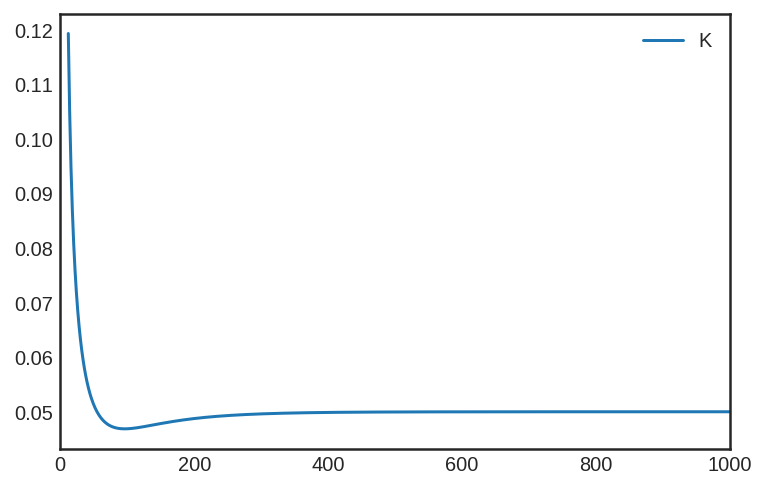

In [0]:
df[["K"]].pct_change().rolling(12).mean().plot()

# Baseline Plots

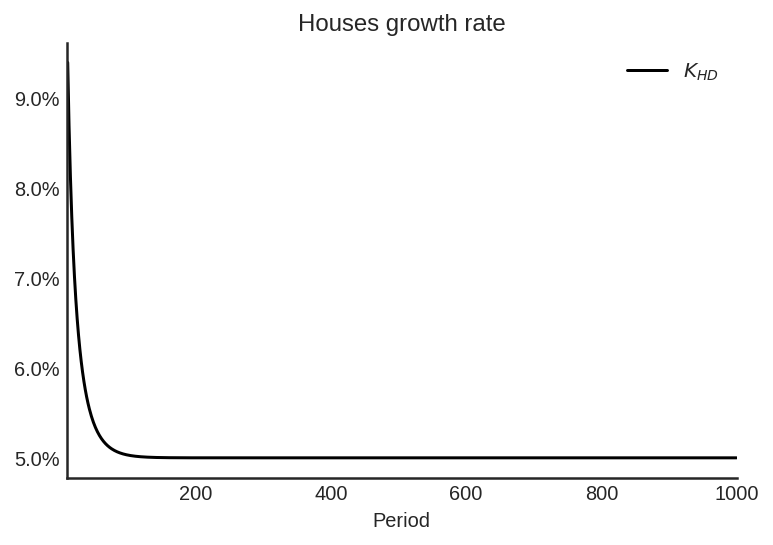

In [0]:
ax = df['K_HD'][10:].pct_change().plot(color = "black", title = "Houses growth rate", label = "$K_{HD}$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.xlabel("Period")
sns.despine()
plt.show()

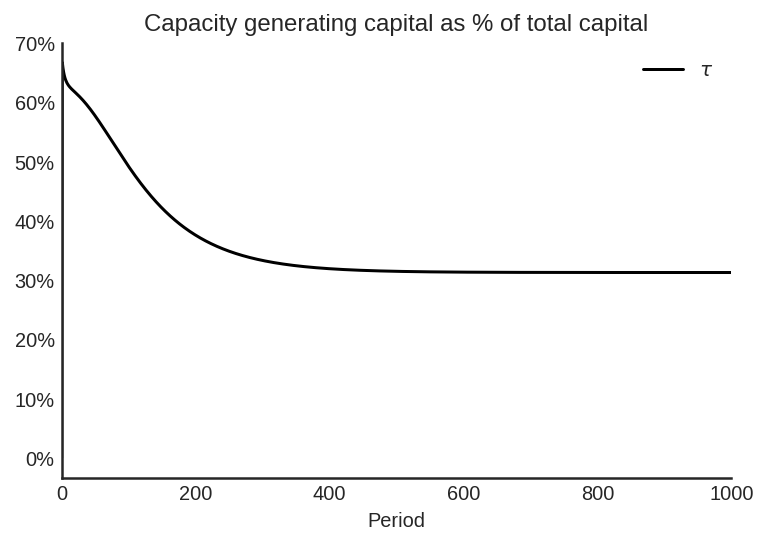

In [0]:
ax = df['tau'].plot(color = "black", title = "Capacity generating capital as % of total capital", label = "$\\tau$", legend = True)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.xlabel("Period")
sns.despine()
plt.show()

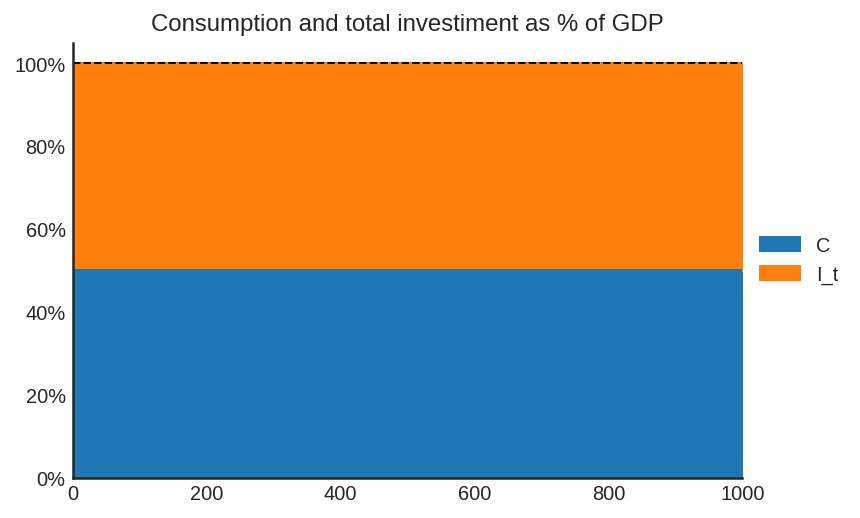

In [0]:
ax = df[['C', 'I_t']].apply(lambda x: x/df['Y']).plot(kind = 'area', stacked = True, legend = True, title = "Consumption and total investiment as % of GDP")
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

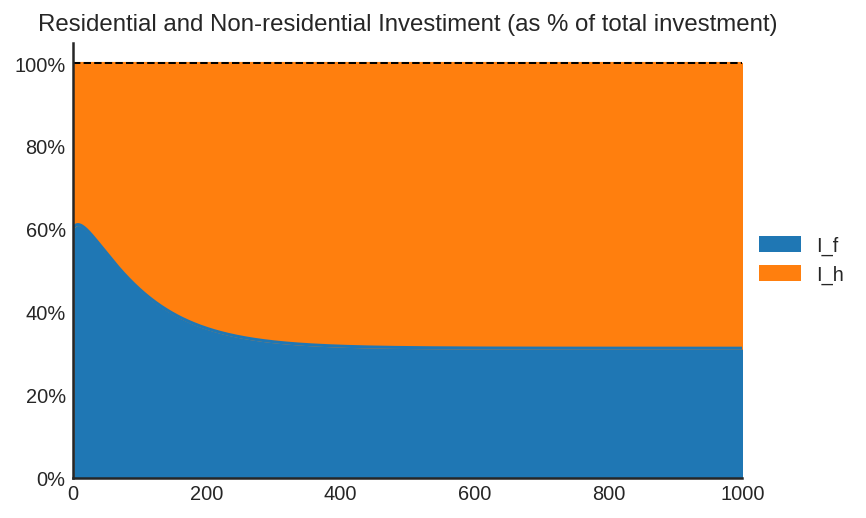

In [0]:
ax = df[['I_f', 'I_h']].apply(lambda x: x/df['I_t']).plot(kind = 'area', stacked = True, legend = True, title = "Residential and Non-residential Investiment (as % of total investment)")
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

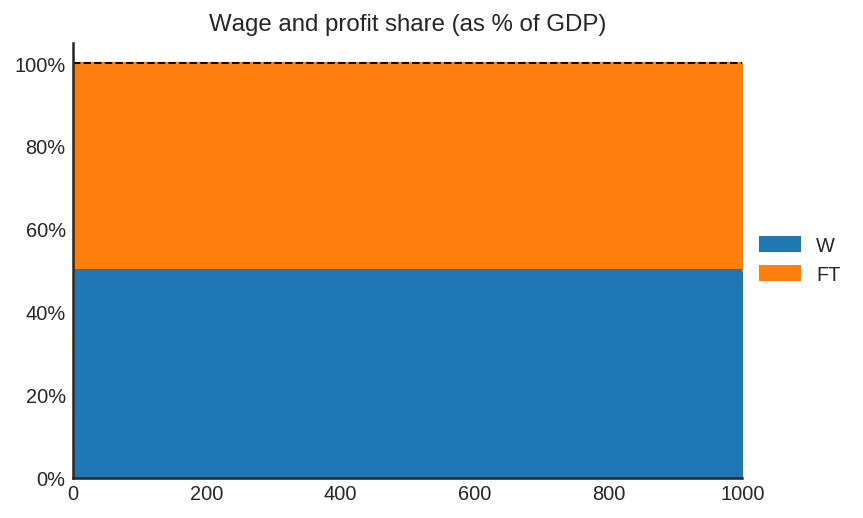

In [0]:
ax = df[['W', 'FT']].apply(lambda x: x/df['Y']).plot(kind = 'area', stacked = True, legend = True, title = "Wage and profit share (as % of GDP)")
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

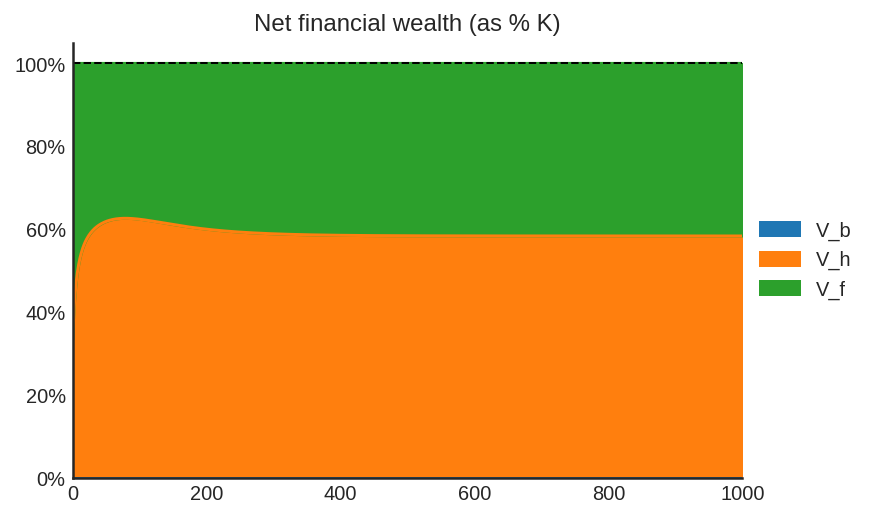

In [0]:
ax = df[['V_b', 'V_h', 'V_f']].apply(lambda x: np.abs(x)/df['K']).plot(kind = 'area', stacked = True, title = "Net financial wealth (as % K)")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.show()

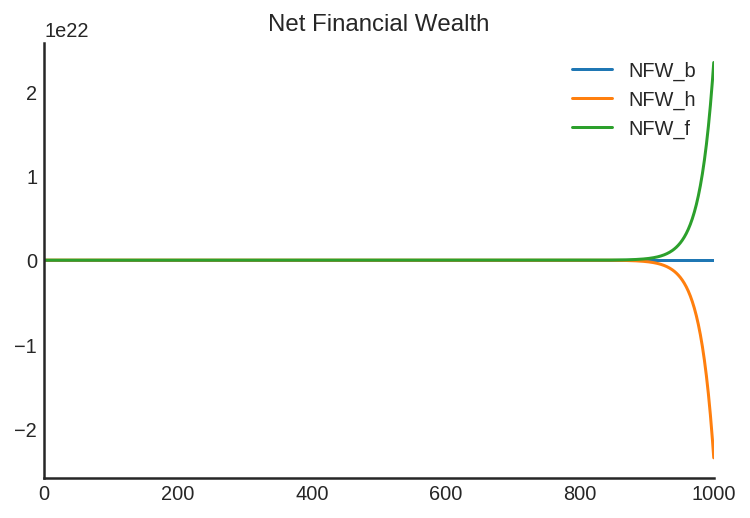

In [0]:
df[["NFW_b", "NFW_h", "NFW_f"]].plot(title = "Net Financial Wealth")
sns.despine()
plt.show()

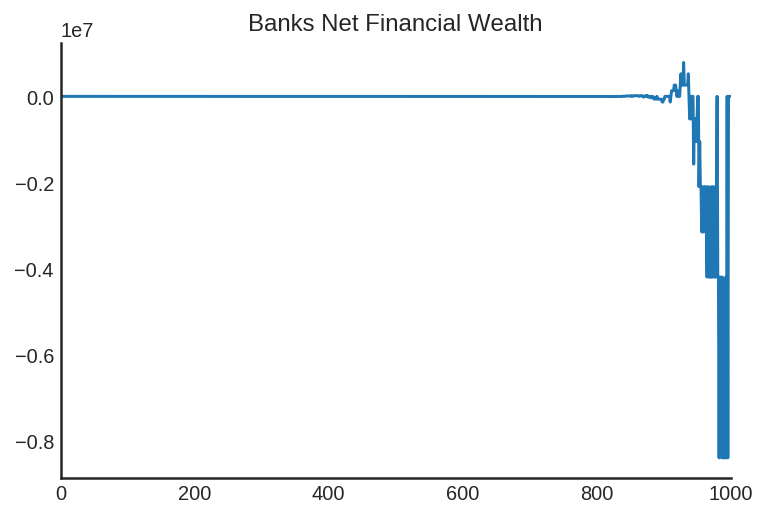

In [0]:
df['NFW_b'].plot(title = "Banks Net Financial Wealth")
sns.despine()
plt.show()

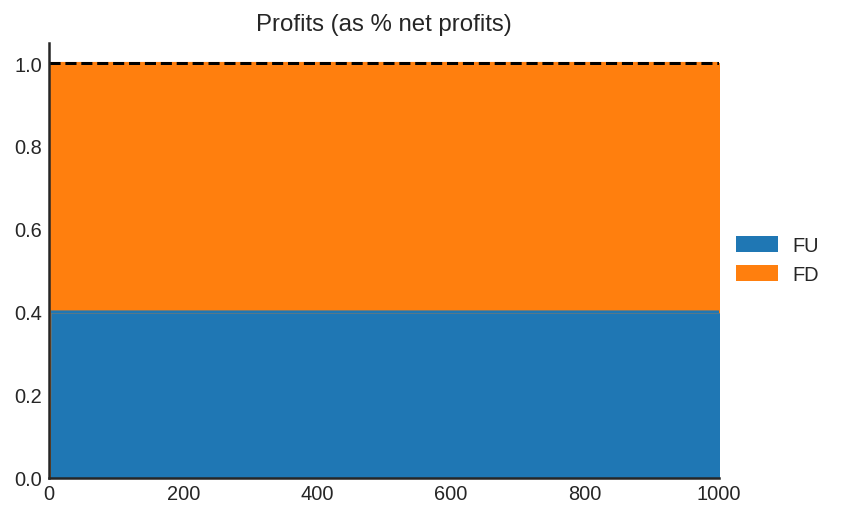

In [0]:
ax = df[["FU", "FD"]].apply(lambda x: x/df["Fn"]).plot(kind = "area", stacked = True, title = "Profits (as % net profits)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axhline(y = 1, color = "black", ls = "--")
sns.despine()
plt.show()

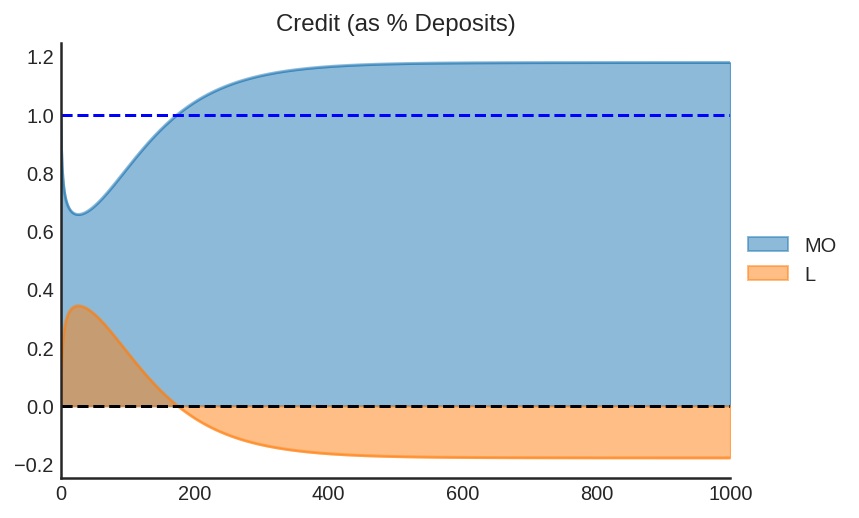

In [0]:
ax = df[["MO", "L"]].apply(lambda x: x/df["M"]).plot(kind = "area",stacked = False ,title = "Credit (as % Deposits)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axhline(y = 1, color = "blue", ls = "--")
ax.axhline(y = 0, color = "black", ls = "--")
sns.despine()
plt.show()

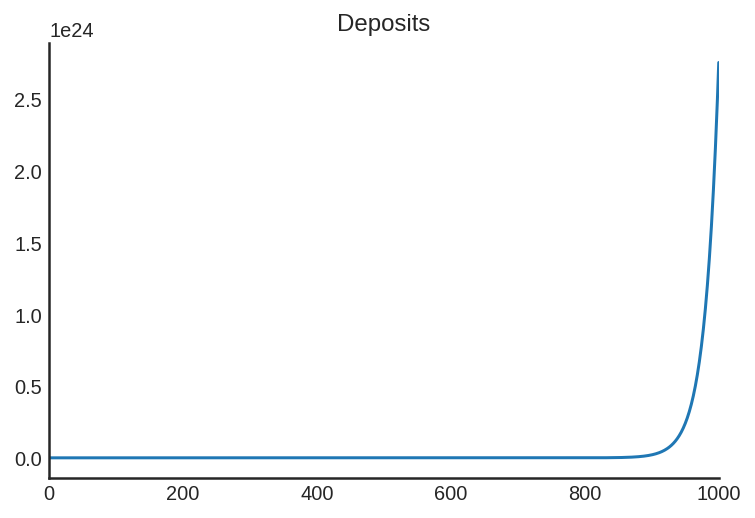

In [0]:
df["M"].plot(title = "Deposits")
sns.despine()
plt.show()

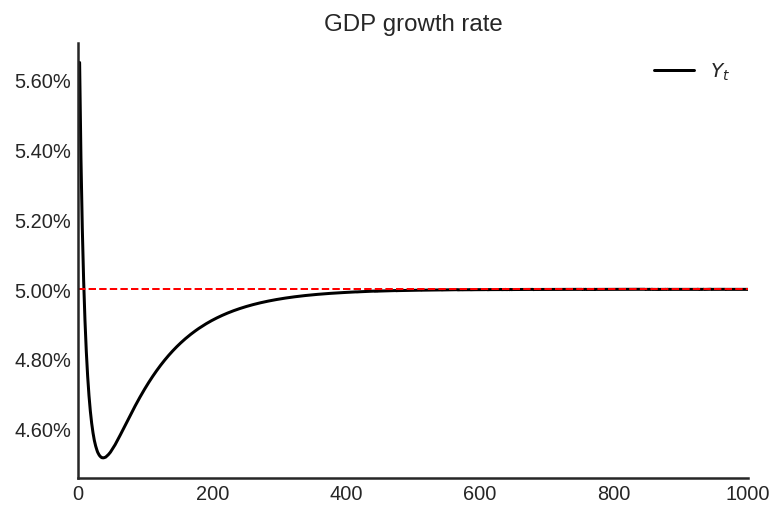

In [0]:
ax = df['Y'].pct_change().plot(color = "black", title = "GDP growth rate", label = "$Y_t$", legend = True)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
ax.axhline(y=df["gz"][0], color = "red", ls = "--", lw=1, label = "Autonomous growth rate")
sns.despine()
plt.show()

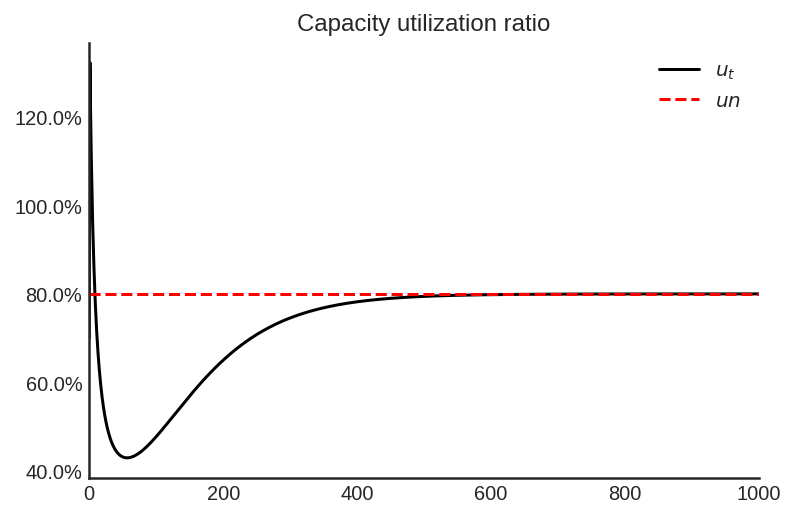

In [0]:
ax = df['u'].plot(color = "black", title = "Capacity utilization ratio", label = "$u_t$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
ax = df['un'].plot(color = "red", ls="--",  title = "Capacity utilization ratio", label = "$un$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

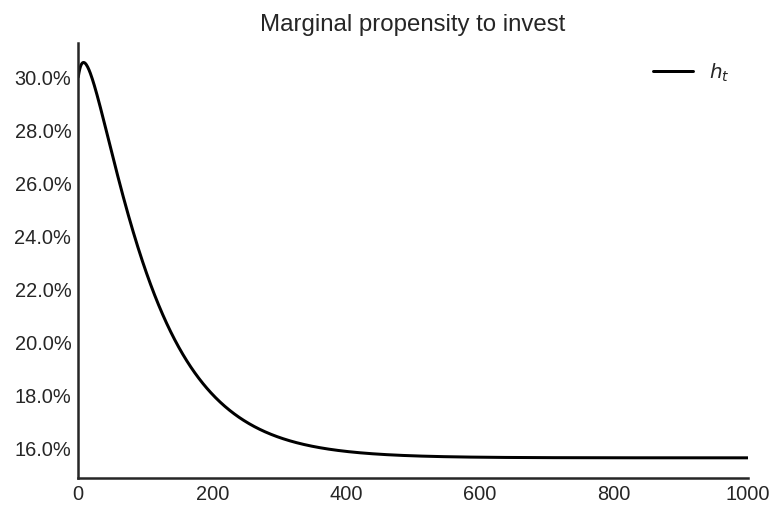

In [0]:
ax = df['h'].plot(color = "black", ls="-",  title = "Marginal propensity to invest", label = "$h_t$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

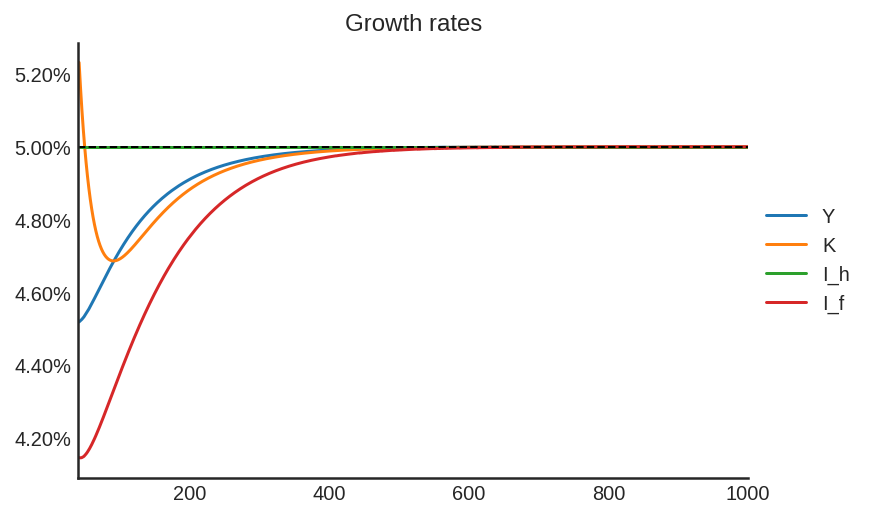

In [0]:
ax = df[["Y", "K", "I_h", "I_f"]][40:].pct_change().plot(title = "Growth rates")
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
ax.axhline(y=df["gz"][0], color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.show()

# Analytical solution

In [0]:
base_eq = model()
SolveSFC(base_eq, time=1, table = False)
t = sp.Symbol('t')
initials = {
    key: base_eq.evaluate(key) for key in base_eq.parameters
}
initials.update({key: base_eq.evaluate(key) for key in base_eq.variables})

Model variables

In [0]:
for i in base_eq.variables:
  globals()["_" + i] = sp.Function(i)

Model parameters

In [0]:
for i in base_eq.parameters:
  globals()[i] = sp.symbols(i, positive=True)

Defining equations

## General equations

In [0]:
Y = _C(t) + _I_t(t)
I = _I_f(t) + _I_h(t)
Yk = _K_f(t-1)/v
u = _Y(t)/_Yk(t)
Z = _I_h(t)
W = _omega(t)*_Y(t)
K = _K_HD(t) + _K_f(t)

## Households

In [0]:
C = alpha*_W(t)
YD = _W(t) + _FD(t) + rm*_M(t-1) - _rmo(t)*_MO(t-1)
S_h = _YD(t) - _C(t)
dMO = _I_h(t)
V_h = _M(t) + _K_HD(t) - _MO(t)
NFW_h = _S_h(t) - _I_h(t)

## Firms

In [0]:
I_f = _h(t)*_Y(t)
dK_f = _I_f(t)
L = _I_f(t) - _FU(t) + _L(t-1)
FT = _FU(t) + _FD(t)
FU = gamma_F*(_FT(t) - _rl(t)*_L(t-1))
FD = (1 - gamma_F)*(_FT(t) - _rl(t)*_L(t-1))
h = _h(t-1)*gamma_u*(_u(t)-un) + _h(t-1)
NFW_f = _FU(t) - _I_f(t)
V_f = _K_f(t) - _L(t)

## Banks

In [0]:
M = (_L(t) - _L(t-1)) + (_MO(t) - _MO(t-1)) + _M(t-1)
rmo = rm + spread_mo
rl = rm + spread_l
V_b = _L(t) + _MO(t) - _M(t)
NFW_b = _rl(t)*_L(t-1) + _rmo(t)*_MO(t-1) - rm*_M(t-1)

## Residential Investment

In [0]:
K_HS = _K_HD(t)
Is = _I_h(t)
dK_HD = _I_h(t)
I_h = _I_h(t-1)*(1+_g_Ih(-1))
g_Ih = gz

# Rearranging

## Level of GDP

In [0]:
EqY = Y - _Y(t)
EqY = EqY.subs(_C(t), C).subs(_I_t(t), I)
EqY = EqY.subs(_I_f(t), I_f)
EqY = EqY.subs(_W(t), W)
EqY = sp.solve(EqY, _Y(t))[0].collect(alpha).collect(omegapar)
solY = EqY
print('Y = ', solY)
print('dY/d alpha = ', EqY.diff(alpha))
print('dY/d omega = ', EqY.diff(_omega(t)))

print("\nReplacing the initial values.....")
EqY = EqY.subs(_h(t), h)
EqY = EqY.subs(alpha, df.loc[2, 'alpha']).subs(_omega(t), df.loc[2, 'omega'])
EqY = EqY.subs(un, df.loc[2, 'un']).subs(gamma_u, df.loc[1, 'gamma_u'])
EqY = EqY.subs(_u(t), df.loc[2, 'u']).subs(_h(t-1), df.loc[1, 'h'])
EqY = EqY.subs(_I_h(t), df.loc[2, 'I_h'])
print('Y0 = ', df.loc[1, 'Y'])
print('Y1 = ', EqY)
print('hat Y - Y1 = ', df.loc[2, "Y"] - EqY)

Y =  -I_h(t)/(alpha*omega(t) + h(t) - 1)
dY/d alpha =  I_h(t)*omega(t)/(alpha*omega(t) + h(t) - 1)**2
dY/d omega =  alpha*I_h(t)/(alpha*omega(t) + h(t) - 1)**2

Replacing the initial values.....
Y0 =  529.1361556137123
Y1 =  559.050660074989
hat Y - Y1 =  -0.0133757390951814


$$
Y_{SR} =  \frac{-I_h(t)}{\alpha\cdot \omega + h(t) - 1}
$$

Rearranging

$$
Y_{SR} =  \frac{I_h(t)}{1 - \alpha\cdot \omega - h(t)}
$$

## Growth rate

In [0]:
gY, h_, gZ = sp.symbols('gY h gZ')
gY_ = omegapar*gY + h_*gY + h + (_Z(t)/_Y(t))*gz - gY - _h(t-1)
print(gY_)
gY_ = gY_.subs(_Y(t), _Z(t)*solY/_I_h(t))
print(gY_)
gY_ = gY_.collect(gZ)
print("gY = ", sp.solve(gY_, gY)[0])

gY*h + gY*omegapar - gY + gamma_u*(-un + u(t))*h(t - 1) + gz*Z(t)/Y(t)
gY*h + gY*omegapar - gY + gamma_u*(-un + u(t))*h(t - 1) - gz*(alpha*omega(t) + h(t) - 1)
gY =  (alpha*gz*omega(t) + gamma_u*un*h(t - 1) - gamma_u*h(t - 1)*u(t) + gz*h(t) - gz)/(h + omegapar - 1)


## Capacity output ratio (short-run)

$$
\frac{Y}{K(-1)} = \frac{Y}{K(-1)}\frac{Yk}{Yk} = \frac{u}{v}
$$

$$
\therefore u = \frac{Y}{K(-1)}v
$$

$$
i_{h_t} = \frac{I_h}{K_{t-1}}
$$

$$
K(-1) = (1+g_K(-1))\cdot K(-2)
$$

In [0]:
Equ = Y - _Y(t)
Equ = Equ.subs(_C(t), _C(t)*v/_K_f(t-1)).subs(_I_t(t), _I_t(t)*v/_K_f(t-1)).subs(_Y(t), _u(t))
Equ = Equ.subs(_C(t), C).subs(_I_t(t), I)
Equ = Equ.subs(_I_f(t), I_f)
Equ = Equ.subs(_W(t), W)
Equ = Equ.expand()
Equ = Equ.subs(_Y(t)/_K_f(t-1), _u(t)/v)
i_h = sp.Function('i_h')
Equ = Equ.subs(_I_h(t)/_K_f(t-1), i_h(t))
Equ = Equ.collect(_u(t))
Equ = Equ.subs(_W(t), W)
Equ = sp.solve(Equ, _u(t))[0].factor().collect(alpha*omegapar).collect(_h(t)).collect(1+_gk(t-1))
Equ = Equ.subs(_I_h(t)/_K_f(t-1), i_h(t))
solu = Equ.collect(alpha**2).collect(omegapar).collect(_YD(t)).collect(alpha)
Equ = Equ.subs(_Y(t), EqY)
print('u = ', solu)
print('\nDerivatives')
print('du/d alpha = ', Equ.diff(alpha))
print('du/d omega = ', Equ.diff(omegapar))

print("\nReplacing the initial values.....")
Equ = Equ.subs(alpha, df.loc[1,'alpha']).subs(_omega(t), df.loc[1,'omega']).subs(alpha, df.loc[1,'alpha'])
Equ = Equ.subs(_gk(t-1), df.loc[0,'gk']).subs(_h(t), df.loc[1,'h']).subs(v, df.loc[1,'v'])
Equ = Equ.subs(i_h(t), df.loc[1,'I_h']/df.loc[0,'K_f']).subs(_YD(t), df.loc[1, 'YD'])

print('u0 = ', df.loc[0,'u'].round(3))
print('u1 = ', Equ)
print("hat u - u1 = ", (df.loc[1,'u'] - Equ))

u =  -v*i_h(t)/(alpha*omega(t) + h(t) - 1)

Derivatives
du/d alpha =  v*i_h(t)*omega(t)/(alpha*omega(t) + h(t) - 1)**2
du/d omega =  0

Replacing the initial values.....
u0 =  0.7
u1 =  1.32287478551251
hat u - u1 =  -3.43964782343331e-5


In [0]:
sp.latex(solu).replace("omegapar", "\\omega")
solu

-v*i_h(t)/(alpha*omega(t) + h(t) - 1)

$$
u_{SR} = 
- \frac{v \operatorname{i_{h}}{\left (t \right )}}{\alpha \omega + h{\left (t \right )} - 1}
$$

Rerranging

$$
u_{SR} =  \frac{v\cdot i_h(t)}{1 - \alpha\cdot \omega - h(t)}
$$

Consider $\tau$ as the fraction between capacity generating capital and total capital (including households' capital):

$$
\tau = \frac{K_f}{K}
$$

The capacity utilization ration can be definede as:

$$
u = \frac{Y\cdot v}{K \cdot \tau}
$$

So, dividing Y by houseolds' capital is the same as:

$$
\frac{Y}{(1-\tau)\cdot K}
$$

Multiplying by $v$:


$$
\frac{Y}{(1-\tau)\cdot K}\cdot v = \frac{Y\cdot v}{K}\cdot \left(\frac{1}{1-\tau}\right)
$$

Multiplying and dividing by $\tau$:

$$
\frac{Y\cdot v}{K\cdot \tau}\cdot \left(\frac{\tau}{1-\tau}\right) = u \cdot \left(\frac{\tau}{1-\tau}\right)
$$

Therefore,

$$
Y\frac{v}{K_h} =  u \cdot \left(\frac{\tau}{1-\tau}\right)
$$

In [0]:
tau = sp.Symbol('tau')
solY = solY.subs(_I_h(t), _I_h(t)*v/_K_HD(t)).subs(_I_h(t)/_K_HD(t), gz)
solY = solY - _u(t)*((tau)/(1-tau))

In [0]:
u_SR = sp.solve(solY, _u(t))[0]
print(sp.latex(u_SR))

\frac{gz v \left(\tau - 1\right)}{\tau \left(\alpha \omega{\left(t \right)} + h{\left(t \right)} - 1\right)}


$$
u_{SR} = \frac{gz v \left(\tau - 1\right)}{\tau \left(\alpha \omega{\left (t \right )} + h{\left (t \right )} - 1\right)}
$$

$$
\tau = \frac{gz v \left(\tau - 1\right)}{u_{SR} \left(\alpha \omega{\left (t \right )} + h{\left (t \right )} - 1\right)}
$$

$$
\frac{\tau}{1-\tau} = \frac{gz v}{u_{SR} \left(1-\alpha \omega{\left (t \right )} - h{\left (t \right )}\right)}
$$

$$
\frac{K_f}{K_H} = \frac{gz v}{u_{SR} \left(1-\alpha \omega{\left (t \right )} - h{\left (t \right )}\right)}
$$

In [0]:
Equ = u_SR
print('u = ', Equ)
print('\nDerivatives')
print('du/d alpha = ', Equ.diff(alpha))
print('du/d omega = ', Equ.diff(omegapar))
print('du/d tau = ', Equ.diff(tau))

print("\nReplacing the initial values.....")
Equ = Equ.subs(alpha, df.loc[20,'alpha']).subs(_omega(t), df.loc[20,'omega']).subs(alpha, df.loc[20,'alpha'])
Equ = Equ.subs(_h(t), df.loc[20,'h']).subs(v, df.loc[20,'v'])
Equ = Equ.subs(tau, df.loc[20,'tau']).subs(gz, df.loc[19, 'gz'])

print('u0 = ', df.loc[0,'u'].round(3))
print('u1 = ', Equ)
print("hat u - u1 = ", (df.loc[21,'u'] - Equ))

u =  gz*v*(tau - 1)/(tau*(alpha*omega(t) + h(t) - 1))

Derivatives
du/d alpha =  -gz*v*(tau - 1)*omega(t)/(tau*(alpha*omega(t) + h(t) - 1)**2)
du/d omega =  0
du/d tau =  gz*v/(tau*(alpha*omega(t) + h(t) - 1)) - gz*v*(tau - 1)/(tau**2*(alpha*omega(t) + h(t) - 1))

Replacing the initial values.....
u0 =  0.7
u1 =  0.388844987402601
hat u - u1 =  0.156989942051096


# Medium run

$$
\Delta h_t = h_{t-1}\cdot \gamma_u\cdot (u_t - un)
$$

In [0]:
Y_MR = solY
Y_MR = Y_MR.subs(_h(t), h).collect(_h(t-1))
print("Y_MR = ", sp.latex(Y_MR))

Y_MR =  - \frac{gz v}{\alpha \omega{\left(t \right)} + \left(\gamma_{u} \left(- un + u{\left(t \right)}\right) + 1\right) h{\left(t - 1 \right)} - 1} - \frac{\tau u{\left(t \right)}}{1 - \tau}


$$
Y_{MR} =  - \frac{gz v}{\alpha \omega{\left (t \right )} + \gamma_{u} \left(- un + u{\left (t \right )}\right) h{\left (t - 1 \right )} + h{\left (t - 1 \right )} - 1} - \frac{\tau u{\left (t \right )}}{- \tau + 1}
$$

In [0]:
u_MR = Y_MR
soluMR = sp.solve(u_MR, _u(t))[0]
soluMR

(tau*(-alpha*omega(t) + gamma_u*un*h(t - 1) - h(t - 1) + 1) - sqrt(tau*(alpha**2*tau*omega(t)**2 - 2*alpha*gamma_u*tau*un*h(t - 1)*omega(t) + 2*alpha*tau*h(t - 1)*omega(t) - 2*alpha*tau*omega(t) + gamma_u**2*tau*un**2*h(t - 1)**2 + 4*gamma_u*gz*tau*v*h(t - 1) - 4*gamma_u*gz*v*h(t - 1) - 2*gamma_u*tau*un*h(t - 1)**2 + 2*gamma_u*tau*un*h(t - 1) + tau*h(t - 1)**2 - 2*tau*h(t - 1) + tau)))/(2*gamma_u*tau*h(t - 1))

$$
u_{MR} = 
\frac{1}{2 \gamma_{u} h{\left (t - 1 \right )}} \left(- \alpha \omega{\left (t \right )} + \gamma_{u} un h{\left (t - 1 \right )} - \sqrt{\alpha^{2} \omega^{2}{\left (t \right )} - 2 \alpha \gamma_{u} un h{\left (t - 1 \right )} \omega{\left (t \right )} + 2 \alpha h{\left (t - 1 \right )} \omega{\left (t \right )} - 2 \alpha \omega{\left (t \right )} + \gamma_{u}^{2} un^{2} h^{2}{\left (t - 1 \right )} - 2 \gamma_{u} un h^{2}{\left (t - 1 \right )} + 2 \gamma_{u} un h{\left (t - 1 \right )} - 4 \gamma_{u} v h{\left (t - 1 \right )} \operatorname{i_{h}}{\left (t \right )} + h^{2}{\left (t - 1 \right )} - 2 h{\left (t - 1 \right )} + 1} - h{\left (t - 1 \right )} + 1\right)
$$

# Long run

In [0]:
Y_LR = Y_MR.subs(_u(t), un)
Y_LR = Y_LR.subs(_h(t-1), _h(t))
Y_LR

-gz*v/(alpha*omega(t) + h(t) - 1) - tau*un/(1 - tau)

$$- \frac{\operatorname{I_{h}}{\left (t \right )}}{\alpha \omega{\left (t \right )} + h{\left (t \right )} - 1}$$

In [0]:
u_LR = u_MR.subs(_h(t), h)
u_LR = u_LR.subs(_u(t), un)
u_LR

-gz*v/(alpha*omega(t) + h(t - 1) - 1) - tau*un/(1 - tau)

$$- un - \frac{v \operatorname{i_{h}}{\left (t \right )}}{\alpha \omega{\left (t \right )} + h{\left (t - 1 \right )} - 1}$$

# Sensibility test

## Test for $\gamma_u$

In [0]:
#gamma_ufor = [i/1000 for i in range(5,1000,5)]

#parametric = False
#if parametric == True:
#  for i in gamma_ufor:
#    gamma_model = model()
#    try:
#      gamma_model.set_values({
#          'gamma_u' : i
#      })
#
#      gammadf = SolveSFC(gamma_model)
#      print("For gamma_u = {}, GDP value is".format(i), gammadf['Y'].iloc[-1])
#      print("\n Ploting...\n")
#      gammadf['u'].plot()
#      plt.show()
#      plt.clf
#
#      if (gammadf['Y'].iloc[-1] < 0):
#        break
#        print("GDP is negative")
#
#      print("Continuing ...")
#    except Exception as e:
#      print("For gamma_u = {},",e)
#      pass
#else: pass
  

## Test for $\alpha$

In [0]:
#alpha_for = [i/100 for i in range(5,100,5)]

#parametric = False
#if parametric == True:
#  for i in alpha_for:
#    mod = model()
#    try:
#      mod.set_values({
#          'alpha' : i
#      })
#
#      df = SolveSFC(mod)
#      print("For alpha = {}, GDP value is".format(i), df['Y'].iloc[-1])
#      print("\n Ploting...\n")
#      df['u'].plot()
#      plt.show()
#      plt.clf()
#
#      if (df['Y'].iloc[-1] < 0):
#        break
#        print("GDP is negative")
#
#      print("Continuing ...")
#    except Exception as e:
#      print("For alpha = {},", e)
#      pass
#else: pass    
  

## Testing for $\alpha$ and $\gamma_u$

In [0]:
#parametric = False
#if parametric == True:
#  alpha_for = [i/100 for i in range(5,105,5)]
#  gamma_ufor = [i/1000 for i in range(5,1000,5)]
#
#  for i in alpha_for:
#    for j in gamma_ufor:
#      mod = model()
#      try:
#        mod.set_values({
#            'alpha' : i,
#            'gamma_u': j
#        })
#
#        df = SolveSFC(mod)
#        print("For alpha = {} and gamma_u = {}, u value is ".format(i,j), df['u'].iloc[-1])
#
#        if (df['Y'].iloc[-1] < 0):
#          break
#          print("GDP is negative")
#
#        print("Continuing ...")
#      except Exception as e:
#        print("For alpha = {} and gamma_u = {},".format(i,j), e)
#        pass
#else: pass


# Shocks

## Increase in autonomous growth rate ($g_z$)

In [0]:
base = model()
df = SolveSFC(base, time=900)
shock = ShockModel(base_model=base, create_function=model(), variable='gz', increase=0.01, time = 900)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950
C,1.710423e+21,1.795944e+21,1.885743e+21,1.980027e+21,2.079030e+21,2.182979e+21,2.292127e+21,2.406733e+21,2.527069e+21,2.653422e+21,2.786096e+21,2.925396e+21,3.071666e+21,3.225248e+21,3.386510e+21,3.555835e+21,3.733626e+21,3.920306e+21,4.116326e+21,4.322136e+21,4.538242e+21,4.765153e+21,5.003410e+21,5.253579e+21,5.516257e+21,5.792091e+21,6.081684e+21,6.385774e+21,6.705040e+21,7.040291e+21,7.392320e+21,7.761918e+21,8.150013e+21,8.557512e+21,8.985411e+21,9.434666e+21,9.906385e+21,1.040170e+22,1.092179e+22,1.146787e+22,...,1.312751e+44,1.391516e+44,1.475007e+44,1.563508e+44,1.657318e+44,1.756758e+44,1.862163e+44,1.973893e+44,2.092327e+44,2.217867e+44,2.350939e+44,2.491996e+44,2.641516e+44,2.800007e+44,2.968008e+44,3.146088e+44,3.334854e+44,3.534946e+44,3.747043e+44,3.971866e+44,4.210181e+44,4.462789e+44,4.730557e+44,5.014391e+44,5.315259e+44,5.634170e+44,5.972221e+44,6.330555e+44,6.710389e+44,7.113012e+44,7.539794e+44,7.992182e+44,8.471714e+44,8.980017e+44,9.518819e+44,1.008995e+45,1.069535e+45,1.133707e+45,1.201729e+45,1.273833e+45
Debt_F,-9.997878e-02,-9.997902e-02,-9.997914e-02,-9.997951e-02,-9.997962e-02,-9.997998e-02,-9.998021e-02,-9.998044e-02,-9.998066e-02,-9.998088e-02,-9.998098e-02,-9.998132e-02,-9.998154e-02,-9.998175e-02,-9.998196e-02,-9.998217e-02,-9.998237e-02,-9.998257e-02,-9.998265e-02,-9.998298e-02,-9.998317e-02,-9.998337e-02,-9.998356e-02,-9.998374e-02,-9.998393e-02,-9.998375e-02,-9.998411e-02,-9.998419e-02,-9.998470e-02,-9.998487e-02,-9.998484e-02,-9.998522e-02,-9.998539e-02,-9.998556e-02,-9.998545e-02,-9.998578e-02,-9.998606e-02,-9.998622e-02,-9.998637e-02,-9.998653e-02,...,-2.381725e-02,-2.381718e-02,-2.381709e-02,-2.381701e-02,-2.381693e-02,-2.381685e-02,-2.381677e-02,-2.381669e-02,-2.381661e-02,-2.381653e-02,-2.381645e-02,-2.381638e-02,-2.381630e-02,-2.381623e-02,-2.381615e-02,-2.381608e-02,-2.381601e-02,-2.381594e-02,-2.381587e-02,-2.381580e-02,-2.381571e-02,-2.381566e-02,-2.381560e-02,-2.381553e-02,-2.381544e-02,-2.381540e-02,-2.381533e-02,-2.381527e-02,-2.381521e-02,-2.381514e-02,-2.381508e-02,-2.381502e-02,-2.381496e-02,-2.381490e-02,-2.381484e-02,-2.381478e-02,-2.381473e-02,-2.381467e-02,-2.381461e-02,-2.381456e-02
Debt_H,1.736811e-01,1.736811e-01,1.736809e-01,1.736812e-01,1.736810e-01,1.736813e-01,1.736814e-01,1.736814e-01,1.736815e-01,1.736815e-01,1.736813e-01,1.736816e-01,1.736816e-01,1.736817e-01,1.736817e-01,1.736817e-01,1.736818e-01,1.736818e-01,1.736816e-01,1.736819e-01,1.736819e-01,1.736820e-01,1.736820e-01,1.736820e-01,1.736821e-01,1.736813e-01,1.736817e-01,1.736815e-01,1.736822e-01,1.736822e-01,1.736818e-01,1.736823e-01,1.736823e-01,1.736824e-01,1.736818e-01,1.736822e-01,1.736825e-01,1.736825e-01,1.736825e-01,1.736826e-01,...,1.305237e-01,1.305238e-01,1.305238e-01,1.305238e-01,1.305237e-01,1.305237e-01,1.305237e-01,1.305237e-01,1.305237e-01,1.305237e-01,1.305237e-01,1.305236e-01,1.305236e-01,1.305236e-01,1.305236e-01,1.305236e-01,1.305236e-01,1.305236e-01,1.305235e-01,1.305235e-01,1.305234e-01,1.305235e-01,1.305235e-01,1.305235e-01,1.305234e-01,1.305235e-01,1.305234e-01,1.305234e-01,1.305234e-01,1.305234e-01,1.305234e-01,1.305234e-01,1.305234e-01,1.305234e-01,1.305234e-01,1.305233e-01,1.305233e-01,1.305233e-01,1.305233e-01,1.305233e-01
Depo,1.473712e-01,1.473712e-01,1.473709e-01,1.473711e-01,1.473709e-01,1.473711e-01,1.473710e-01,1.473710e-01,1.473710e-01,1.473710e-01,1.473708e-01,1.473709e-01,1.473709e-01,1.473709e-01,1.473709e-01,1.473709e-01,1.473709e-01,1.473708e-01,1.473706e-01,1.473708e-01,1.473708e-01,1.473708e-01,1.473708e-01,1.473707e-01,1.473707e-01,1.473701e-01,1.473703e-01,1.473701e-01,1.473706e-01,1.473706e-01,1.473703e-01,1.473706e-01,1.473706e-01,1.473706e-01,1.473701e-01,1.473703e-01,1.473705e-01,1.473705e-0

In [0]:
summary = SummaryShock(shock)
summary

,0,Shock,1,2,3,t-1,t,difference
C,1.961398e+22,2.059462e+22,2.183106e+22,2.314247e+22,2.453348e+22,1.201729e+45,1.273833e+45,7.210385e+43
Debt_F,-9.998786e-02,-9.998828e-02,-9.907914e-02,-9.821000e-02,-9.737775e-02,-2.381461e-02,-2.381456e-02,5.587845e-08
Debt_H,1.736823e-01,1.736829e-01,1.720211e-01,1.704480e-01,1.689578e-01,1.305233e-01,1.305233e-01,-1.040483e-08
Depo,1.473699e-01,1.473703e-01,1.459603e-01,1.446276e-01,1.433674e-01,1.244979e-01,1.244979e-01,3.903508e-09
FD,1.225867e+22,1.287157e+22,1.363918e+22,1.445327e+22,1.531669e+22,7.279722e+44,7.716505e+44,4.367837e+43
FT,1.961398e+22,2.059462e+22,2.183106e+22,2.314247e+22,2.453348e+22,1.201729e+45,1.273833e+45,7.210385e+43
FU,8.172450e+21,8.581049e+21,9.092788e+21,9.635510e+21,1.021113e+22,4.853148e+44,5.144337e+44,2.911891e+43
Fn,2.043112e+22,2.145262e+22,2.273197e+22,2.408878e+22,2.552782e+22,1.213287e+45,1.286084e+45,7.279728e+43
I_f,6.129524e+21,6.435979e+21,6.822898e+21,7.233838e+21,7.670333e+21,4.506434e+44,4.776821e+44,2.703870e+43
I_h,1.348448e+22,1.415870e+22,1.500822e+22,1.590872e+22,1.686324e+22,7.510873e+44,7.961525e+44,4.506524e+43


In [0]:
shock1 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock1.columns = ['$\Delta g_Z$']
shock1

,$\Delta g_Z$
alpha,1.000
g_Ih,0.060
gamma_F,0.400
gamma_u,0.010
gk,0.060
gz,0.060
h,0.187
omega,0.500
omegapar,0.500
rl,0.020


### Plots

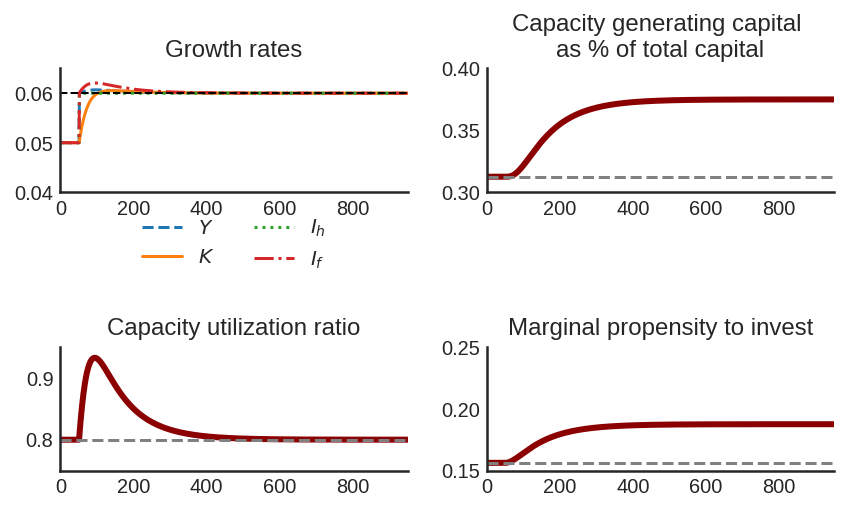

In [0]:
fig, ax = plt.subplots(2,2)

shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('--'),
                                                  )
shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-'),
                                                  )
shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = (':'),
                                                  )
shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-.'),
                                                  )
ax[0,0].set_ylim(0.04,0.065)
ax[0,0].axhline(y=shock["gz"].iloc[-1], color = "black", ls = "--", lw=1)
#ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
               labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
          fancybox=True, shadow=True, ncol=2)

shock['tau'].plot(color = "darkred", title = "Capacity generating capital \nas % of total capital", label = "$\\tau$", legend = False, ax = ax[0,1], lw = 3, )
ax[0,1].set_ylim(0.30,0.40)
ax[0,1].axhline(y = df['tau'].iloc[-1], ls ='--', color = "gray")
#ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
ax[1,0].set_ylim(0.75,0.95)
#ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
ax[1,1].axhline(y = df['h'].iloc[-1], ls ='--', color = "gray")
ax[1,1].set_ylim(0.15,0.25)
sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.suptitle('Increase in autonomous growth rate ($g_z$)')
plt.show()



fig.savefig('Shock_1.png', dpi = 300)

## Increase in wage-share ($\omega$)

In [0]:
base = model()
df = SolveSFC(base, time=700)
shock = ShockModel(base_model=base, create_function=model(), variable='omegapar', increase=0.07, time = 900)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950
C,9.892988e+16,1.038761e+17,1.090697e+17,1.145231e+17,1.202487e+17,1.262609e+17,1.325739e+17,1.392019e+17,1.461617e+17,1.534694e+17,1.611426e+17,1.691997e+17,1.776589e+17,1.865414e+17,1.958681e+17,2.056611e+17,2.159437e+17,2.267404e+17,2.380769e+17,2.499802e+17,2.624793e+17,2.756021e+17,2.893817e+17,3.038506e+17,3.190425e+17,3.349936e+17,3.517426e+17,3.693290e+17,3.877948e+17,4.071838e+17,4.275422e+17,4.489186e+17,4.713647e+17,4.949310e+17,5.196773e+17,5.456596e+17,5.729417e+17,6.015878e+17,6.316661e+17,6.632484e+17,...,2.847611e+36,2.989991e+36,3.139491e+36,3.296465e+36,3.461289e+36,3.634353e+36,3.816071e+36,4.006874e+36,4.207218e+36,4.417585e+36,4.638457e+36,4.870387e+36,5.113899e+36,5.369594e+36,5.638074e+36,5.919977e+36,6.215976e+36,6.526780e+36,6.853113e+36,7.195769e+36,7.555557e+36,7.933335e+36,8.330002e+36,8.746508e+36,9.183827e+36,9.643018e+36,1.012517e+37,1.063144e+37,1.116300e+37,1.172115e+37,1.230721e+37,1.292257e+37,1.356869e+37,1.424713e+37,1.495948e+37,1.570746e+37,1.649283e+37,1.731747e+37,1.818335e+37,1.909251e+37
Debt_F,-9.978127e-02,-9.978380e-02,-9.978631e-02,-9.978859e-02,-9.979125e-02,-9.979367e-02,-9.979586e-02,-9.979844e-02,-9.980078e-02,-9.980309e-02,-9.980538e-02,-9.980743e-02,-9.980988e-02,-9.981208e-02,-9.981426e-02,-9.981641e-02,-9.981854e-02,-9.982065e-02,-9.982273e-02,-9.982479e-02,-9.982661e-02,-9.982884e-02,-9.983082e-02,-9.983267e-02,-9.983461e-02,-9.983665e-02,-9.983855e-02,-9.984042e-02,-9.984227e-02,-9.984410e-02,-9.984591e-02,-9.984770e-02,-9.984926e-02,-9.985122e-02,-9.985283e-02,-9.985466e-02,-9.985634e-02,-9.985801e-02,-9.985966e-02,-9.986128e-02,...,-4.285564e-02,-4.285566e-02,-4.285568e-02,-4.285569e-02,-4.285571e-02,-4.285573e-02,-4.285574e-02,-4.285576e-02,-4.285578e-02,-4.285573e-02,-4.285581e-02,-4.285577e-02,-4.285584e-02,-4.285586e-02,-4.285587e-02,-4.285589e-02,-4.285590e-02,-4.285589e-02,-4.285593e-02,-4.285595e-02,-4.285596e-02,-4.285598e-02,-4.285599e-02,-4.285597e-02,-4.285602e-02,-4.285603e-02,-4.285604e-02,-4.285600e-02,-4.285607e-02,-4.285608e-02,-4.285609e-02,-4.285611e-02,-4.285612e-02,-4.285613e-02,-4.285614e-02,-4.285615e-02,-4.285616e-02,-4.285618e-02,-4.285619e-02,-4.285620e-02
Debt_H,1.736438e-01,1.736443e-01,1.736448e-01,1.736448e-01,1.736457e-01,1.736462e-01,1.736462e-01,1.736471e-01,1.736475e-01,1.736480e-01,1.736484e-01,1.736484e-01,1.736492e-01,1.736496e-01,1.736501e-01,1.736505e-01,1.736509e-01,1.736513e-01,1.736517e-01,1.736520e-01,1.736520e-01,1.736528e-01,1.736532e-01,1.736533e-01,1.736537e-01,1.736543e-01,1.736546e-01,1.736550e-01,1.736553e-01,1.736557e-01,1.736560e-01,1.736564e-01,1.736563e-01,1.736570e-01,1.736571e-01,1.736577e-01,1.736580e-01,1.736583e-01,1.736586e-01,1.736589e-01,...,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327274e-01,1.327276e-01,1.327274e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327275e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327275e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327274e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01,1.327276e-01
Depo,1.473886e-01,1.473884e-01,1.473882e-01,1.473876e-01,1.473877e-01,1.473875e-01,1.473869e-01,1.473871e-01,1.473869e-01,1.473867e-01,1.473865e-01,1.473859e-01,1.473861e-01,1.473859e-01,1.473857e-01,1.473855e-01,1.473853e-01,1.473851e-01,1.473850e-01,1.473848e-01,1.473842e-01,1.473844e-01,1.473842e-01,1.473839e-01,1.473837e-01,1.473837e-01,1.473836e-01,1.473834e-01,1.473832e-01,1.473831e-01,1.473829e-01,1.473828e-01,1.473822e-01,1.473824e-01,1.473821e-01,1.473821e-01,1.473820e-01,1.473818e-0

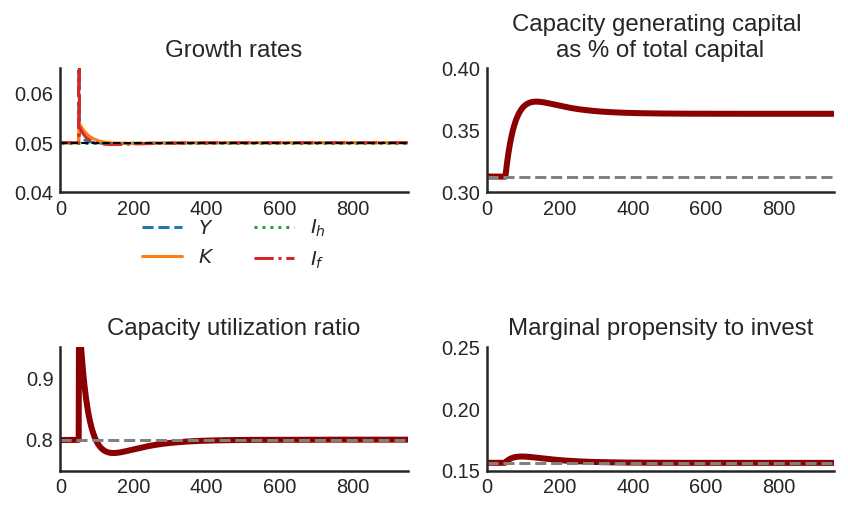

In [0]:
fig, ax = plt.subplots(2,2)

shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('--'),
                                                  )
shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-'),
                                                  )
shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = (':'),
                                                  )
shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-.'),
                                                  )
ax[0,0].set_ylim(0.04,0.065)
ax[0,0].axhline(y=shock["gz"].iloc[-1], color = "black", ls = "--", lw=1)
#ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
               labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
          fancybox=True, shadow=True, ncol=2)

shock['tau'].plot(color = "darkred", title = "Capacity generating capital \nas % of total capital", label = "$\\tau$", legend = False, ax = ax[0,1], lw = 3, )
ax[0,1].set_ylim(0.30,0.40)
ax[0,1].axhline(y = df['tau'].iloc[-1], ls ='--', color = "gray")
#ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
ax[1,0].set_ylim(0.75,0.95)
#ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
ax[1,1].axhline(y = df['h'].iloc[-1], ls ='--', color = "gray")
ax[1,1].set_ylim(0.15,0.25)
sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.suptitle('Increase in wage-share ($\omega$)')
plt.show()



fig.savefig('Shock_2.png', dpi = 300)

In [0]:
shock2 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock2.columns = ['$\Delta \omega$']
shock2

,$\Delta \omega$
alpha,1.000
g_Ih,0.050
gamma_F,0.400
gamma_u,0.010
gk,0.050
gz,0.050
h,0.156
omega,0.570
omegapar,0.570
rl,0.020


## Increase in interest rates

In [0]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='rm', increase=0.005, time = 1000)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050
C,2.249196e+23,2.361655e+23,2.479738e+23,2.603730e+23,2.733911e+23,2.870606e+23,3.014136e+23,3.164843e+23,3.323085e+23,3.489239e+23,3.663710e+23,3.846893e+23,4.039229e+23,4.241190e+23,4.453249e+23,4.675912e+23,4.909707e+23,5.155192e+23,5.412951e+23,5.683598e+23,5.967778e+23,6.266166e+23,6.579474e+23,6.908447e+23,7.253869e+23,7.616562e+23,7.997390e+23,8.397259e+23,8.817133e+23,9.257977e+23,9.720876e+23,1.020692e+24,1.071726e+24,1.125314e+24,1.181578e+24,1.240657e+24,1.302695e+24,1.367824e+24,1.436217e+24,1.508032e+24,...,5.948467e+44,6.245909e+44,6.558185e+44,6.886094e+44,7.230399e+44,7.591919e+44,7.971538e+44,8.370091e+44,8.788595e+44,9.228025e+44,9.689455e+44,1.017390e+45,1.068259e+45,1.121672e+45,1.177760e+45,1.236644e+45,1.298476e+45,1.363400e+45,1.431572e+45,1.503148e+45,1.578305e+45,1.657221e+45,1.740085e+45,1.827086e+45,1.918440e+45,2.014362e+45,2.115080e+45,2.220834e+45,2.331876e+45,2.448474e+45,2.570893e+45,2.699443e+45,2.834421e+45,2.976139e+45,3.124937e+45,3.281184e+45,3.445249e+45,3.617505e+45,3.798380e+45,3.988299e+45
Debt_F,-9.999336e-02,-9.999343e-02,-9.999350e-02,-9.999337e-02,-9.999366e-02,-9.999372e-02,-9.999379e-02,-9.999386e-02,-9.999393e-02,-9.999400e-02,-9.999380e-02,-9.999394e-02,-9.999422e-02,-9.999428e-02,-9.999434e-02,-9.999440e-02,-9.999447e-02,-9.999453e-02,-9.999459e-02,-9.999465e-02,-9.999470e-02,-9.999476e-02,-9.999482e-02,-9.999488e-02,-9.999493e-02,-9.999499e-02,-9.999505e-02,-9.999510e-02,-9.999504e-02,-9.999521e-02,-9.999527e-02,-9.999532e-02,-9.999537e-02,-9.999530e-02,-9.999548e-02,-9.999553e-02,-9.999519e-02,-9.999565e-02,-9.999558e-02,-9.999540e-02,...,-1.296295e-01,-1.296291e-01,-1.296295e-01,-1.296295e-01,-1.296295e-01,-1.296295e-01,-1.296291e-01,-1.296295e-01,-1.296295e-01,-1.296295e-01,-1.296291e-01,-1.296295e-01,-1.296295e-01,-1.296295e-01,-1.296290e-01,-1.296295e-01,-1.296295e-01,-1.296295e-01,-1.296293e-01,-1.296295e-01,-1.296295e-01,-1.296295e-01,-1.296293e-01,-1.296295e-01,-1.296295e-01,-1.296295e-01,-1.296295e-01,-1.296295e-01,-1.296295e-01,-1.296292e-01,-1.296295e-01,-1.296292e-01,-1.296290e-01,-1.296291e-01,-1.296295e-01,-1.296295e-01,-1.296293e-01,-1.296295e-01,-1.296295e-01,-1.296295e-01
Debt_H,1.736838e-01,1.736839e-01,1.736839e-01,1.736835e-01,1.736839e-01,1.736839e-01,1.736839e-01,1.736839e-01,1.736840e-01,1.736840e-01,1.736834e-01,1.736836e-01,1.736840e-01,1.736840e-01,1.736840e-01,1.736840e-01,1.736841e-01,1.736841e-01,1.736841e-01,1.736841e-01,1.736841e-01,1.736841e-01,1.736841e-01,1.736841e-01,1.736842e-01,1.736842e-01,1.736842e-01,1.736842e-01,1.736839e-01,1.736842e-01,1.736842e-01,1.736842e-01,1.736842e-01,1.736840e-01,1.736843e-01,1.736843e-01,1.736835e-01,1.736843e-01,1.736840e-01,1.736836e-01,...,2.178233e-01,2.178226e-01,2.178233e-01,2.178233e-01,2.178233e-01,2.178233e-01,2.178226e-01,2.178233e-01,2.178233e-01,2.178233e-01,2.178226e-01,2.178233e-01,2.178233e-01,2.178233e-01,2.178223e-01,2.178233e-01,2.178233e-01,2.178233e-01,2.178229e-01,2.178233e-01,2.178233e-01,2.178233e-01,2.178229e-01,2.178233e-01,2.178233e-01,2.178233e-01,2.178233e-01,2.178233e-01,2.178233e-01,2.178229e-01,2.178233e-01,2.178229e-01,2.178223e-01,2.178226e-01,2.178233e-01,2.178233e-01,2.178229e-01,2.178233e-01,2.178233e-01,2.178233e-01
Depo,1.473699e-01,1.473699e-01,1.473699e-01,1.473695e-01,1.473699e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473693e-01,1.473694e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473698e-01,1.473697e-01,1.473697e-01,1.473697e-01,1.473697e-01,1.473695e-01,1.473697e-01,1.473697e-01,1.473697e-01,1.473697e-01,1.473695e-01,1.473697e-

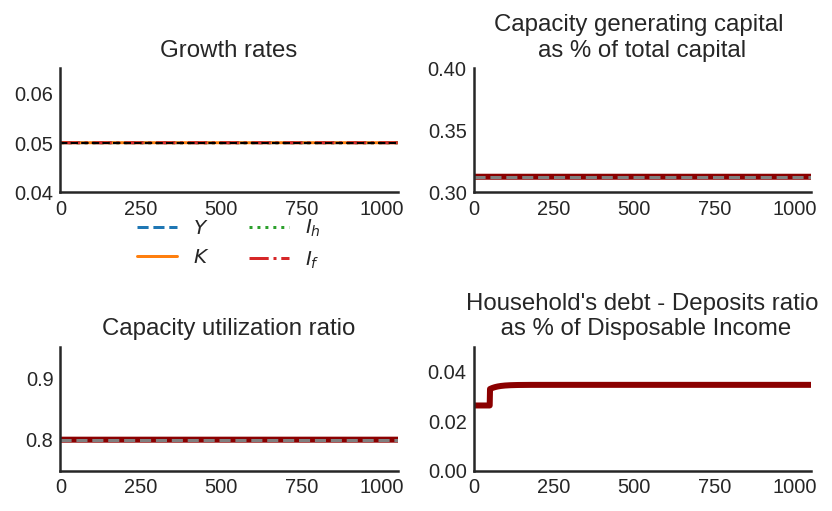

In [0]:
fig, ax = plt.subplots(2,2)

shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('--'),
                                                  )
shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-'),
                                                  )
shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = (':'),
                                                  )
shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-.'),
                                                  )

ax[0,0].set_ylim(0.04,0.065)
ax[0,0].axhline(y=shock["gz"].iloc[-1], color = "black", ls = "--", lw=1)
#ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
               labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
          fancybox=True, shadow=True, ncol=2)

shock['tau'].plot(color = "darkred", title = "Capacity generating capital \nas % of total capital", label = "$\\tau$", legend = False, ax = ax[0,1], lw = 3, )
ax[0,1].set_ylim(0.30,0.40)
ax[0,1].axhline(y = df['tau'].iloc[-1], ls ='--', color = "gray")
#ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
ax[1,0].set_ylim(0.75,0.95)
#ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

#shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
(shock["Debt_H"] - shock["Depo"]).plot(title = "Household's debt - Deposits ratio\n as % of Disposable Income",
                                      ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
ax[1,1].set_ylim(0.,0.05)

sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.suptitle('Increase in interest rates')
plt.show()

fig.savefig('Shock_3.png', dpi = 300)

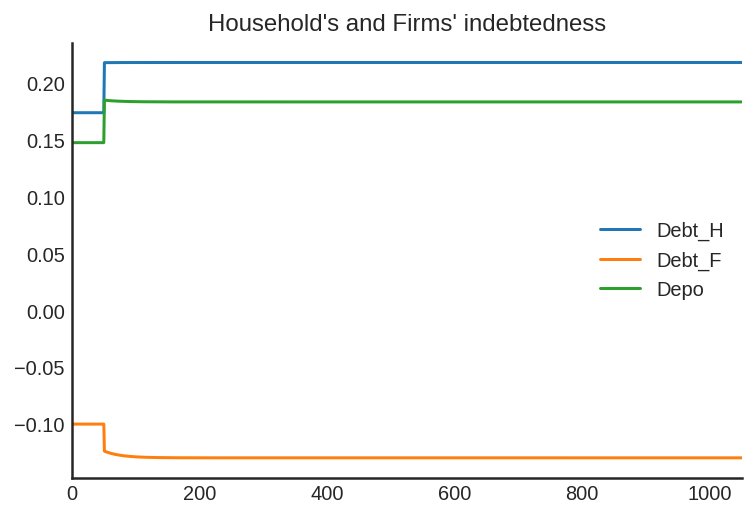

In [0]:
shock[['Debt_H', 'Debt_F', "Depo"]].plot(title = "Household's and Firms' indebtedness")
sns.despine()
plt.show()

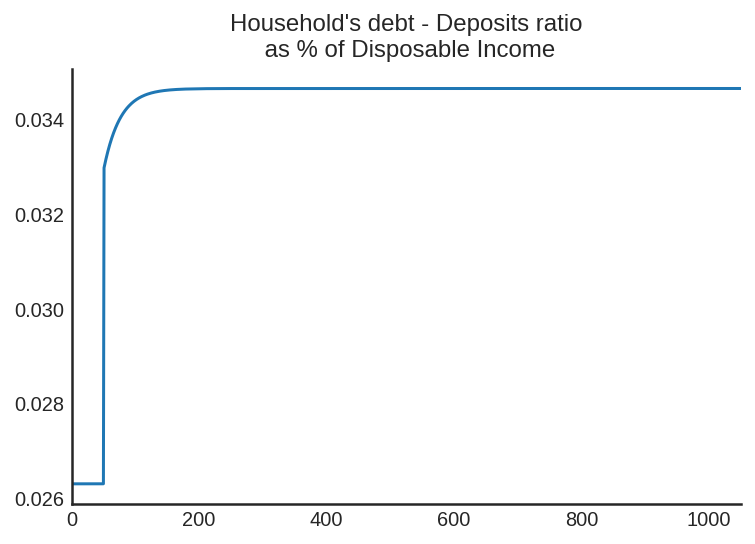

In [0]:
(shock["Debt_H"] - shock["Depo"]).plot(title = "Household's debt - Deposits ratio\n as % of Disposable Income")
sns.despine()
plt.show()

In [0]:
df_['Debt_F'].plot()

NameError: ignored

# Shock yourself

In [0]:
df_ = df

In [0]:
@interact(variable = df_.transpose().loc['alpha':,:].index, increase = (-1,1,0.01))
def shock_yourself(variable, increase):
  shock = ShockModel(base_model = base, create_function = model(), variable = variable, increase = increase)
  fig, ax = plt.subplots(2,2)

  shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                    ls = ('--'),
                                                    )
  shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                    ls = ('-'),
                                                    )
  shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                    ls = (':'),
                                                    )
  shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                    ls = ('-.'),
                                                    )

  ax[0,0].set_ylim(0.04,0.065)
  ax[0,0].axhline(y=shock["gz"].iloc[-1], color = "black", ls = "--", lw=1)
  #ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
  ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
                 labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
            fancybox=True, shadow=True, ncol=2)

  shock['tau'].plot(color = "darkred", title = "Capacity generating capital \nas % of total capital", label = "$\\tau$", legend = False, ax = ax[0,1], lw = 3, )
  ax[0,1].set_ylim(0.30,0.40)
  ax[0,1].axhline(y = df_['tau'].iloc[-1], ls ='--', color = "gray")
  #ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


  shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
  ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
  ax[1,0].set_ylim(0.75,0.95)
  #ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

  shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
  ax[1,1].axhline(y = df_['h'].iloc[-1], ls ='--', color = "gray")
  ax[1,1].set_ylim(0.15,0.25)

  sns.despine()
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  fig.suptitle('Increase in interest rates')
  plt.show()



In [0]:
shock3 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock3.columns = ['$\Delta rm$']
shock3

# Merging tables

In [0]:
df = df.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
df.columns = ['Base scenario']
df

table = pd.merge(left = df, right = shock1, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock2, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock3, left_index = True, right_index = True)
table.to_latex("table.tex", bold_rows = True, column_format = 'c', decimal = ',')
table

# Finishing

In [0]:
print("Running time: ", datetime.now() - t1)